<h1 align="center">Random Forest Regression - Bostan House Price Prediction</h1>

---

## Importing Packages

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

from math import log
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

## About the Data

In [2]:
# Loading the boston datasets
boston_datasets = load_boston()

type(boston_datasets)
# Type is Bunch : i.e. it has a number of attributes
# ['DESCR', 'data', 'feature_names', 'filename', 'target']

sklearn.utils.Bunch

In [3]:
# Dir shows all the directory from the boston Datasets
dir(boston_datasets)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
print(boston_datasets.DESCR)
# boston_datasets.filename Example:- boston_datasets.feature_names

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# Actual prices in thousands
print("Actual prices(thousands)\n",boston_datasets.target)

print("\nBoston DataSet \n",boston_datasets.data)
print("\nData Type: ",type(boston_datasets.data))
print("\nShape of the Dataset: ",boston_datasets.data.shape)

print("\nBoston Data Set Attributes \n",boston_datasets.feature_names) #feature_names = attributes

Actual prices(thousands)
 [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 

---

## Gathering Data

<pre>As the features and the target data is in two different form ; we need to combine the dataset in a single dataframe

In [6]:
#Create Pandas DataFrame
Data = pd.DataFrame(boston_datasets.data)
# This does have a column Name

# With column_Name
Data = pd.DataFrame(data= boston_datasets.data, columns= boston_datasets.feature_names)
Data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


<pre><b>Adding the target Data to this dataframe as well

In [7]:
Data['TARGET'] = boston_datasets.target

In [8]:
Data.head()
# Printing the First 5 values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


---

## Data PreProcessing

### Checking for Missing Values

In [9]:
pd.isnull(Data) # This will retuen missing values or TRUE i.e. the row is empty

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
pd.isnull(Data).any()  # Checking if there is any missing values in any column 

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
TARGET     False
dtype: bool

In [11]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  TARGET   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


---

## Statistical Analysis of Data  

In [12]:
Data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Finding the correlation

In [13]:
Data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Correlation Matrix with Heatmap

In [14]:
# Since the above table is repetitive ; in order to see only the single value; thisis done
mask1 = np.zeros_like(Data.corr()) # This will create a table of 0 similar to the size of Data.corr()
triangle_indices= np.triu_indices_from(mask1) #
mask1[triangle_indices] = True # This will make the top triangle values true
mask1

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

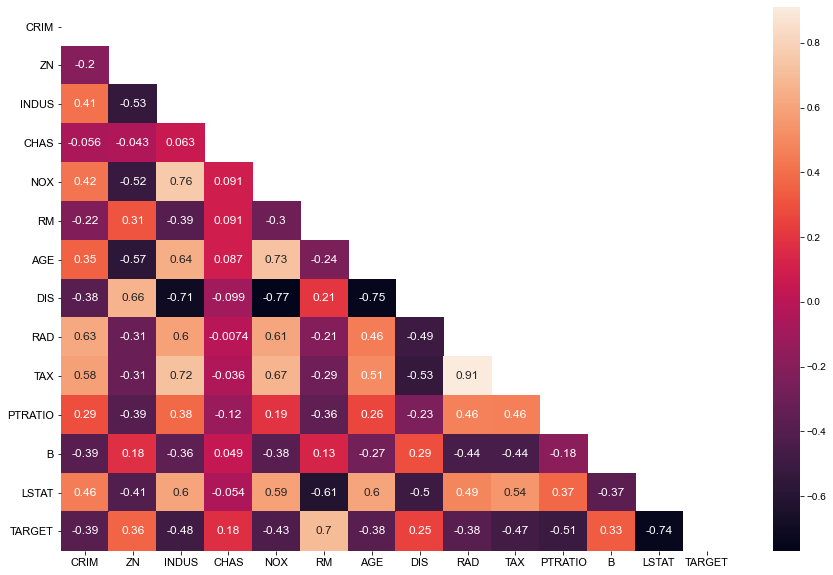

In [15]:
plt.figure(figsize=[15,10])
sns.heatmap(Data.corr(), mask = mask1, annot=True, annot_kws={"size":12})
# annot is use to display the values of the relations
# annot_kws (Keyword_size) is use to change the size
sns.set_style('darkgrid')

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()

---

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [16]:
from sklearn.ensemble  import ExtraTreesRegressor

In [17]:
model = ExtraTreesRegressor()
model.fit(boston_datasets.data, boston_datasets.target)

ExtraTreesRegressor()

In [18]:
# This is used when we have many features and we have to select top 10 featues from the DataSet
fea_impotance = pd.DataFrame({
                                 'Features': boston_datasets.feature_names,
                                 'Feature_Imp' : model.feature_importances_,
                                 'Feature_Imp (%)': model.feature_importances_*100
                                 })
fea_impotance

,Features,Feature_Imp,Feature_Imp (%)
0,CRIM,0.034192,3.419241
1,ZN,0.005493,0.549306
2,INDUS,0.044032,4.403185
3,CHAS,0.015338,1.533772
4,NOX,0.048014,4.801373
5,RM,0.329202,32.920223
6,AGE,0.020534,2.053437
7,DIS,0.033451,3.345057
8,RAD,0.021714,2.171359
9,TAX,0.043313,4.331277


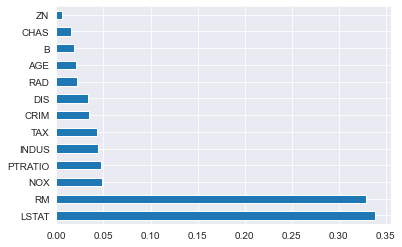

In [19]:
# Plotting the Graph of FEATURE IMPORTANCE for better visualisation
feat_imp = pd.Series(model.feature_importances_, index=boston_datasets.feature_names)
feat_imp.nlargest(13).plot(kind='barh')
plt.show()

---

## Implementing the Random Forest Regression Model

#### Train Test Data Split

In [20]:
Price = Data['TARGET']
# Price variable will be having all the values excepts the TARGET Column
features = Data.drop('TARGET',axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features, Price, test_size=0.2, train_size=0.8, random_state=10)

#To check whether data is splitted in 80/20 Format or not
print(round(len(X_train)/len(features),2)) # --> 0.8 Method1
print(round(X_train.shape[0]/features.shape[0],2)) #--> 0.2 Method2

0.8
0.8


#### Loading the Model

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

---

## Evaluating the Model

#### Calculating R Square Value
<pre>
R Square is calculated by the sum of squared of prediction error divided by the total sum of the square which replaces 
the calculated prediction with mean. R Square value is between 0 to 1 and a bigger value indicates a better fit between prediction and actual value.

In [22]:
# RSquared for Training DataSet 
r_squared = rf.score(X_train,Y_train)
print(f'Coefficient of determination R-Square on Training Data {r_squared}')

# ======================================================================================== 

# RSquared for Testing DataSet 
r_squared = rf.score(X_test,Y_test)
print(f'Coefficient of determination R-Square on Testing Data  {r_squared}')

Coefficient of determination R-Square on Training Data 0.9812907400497927
Coefficient of determination R-Square on Testing Data  0.8554558156230727


In [23]:
prediction = rf.predict(X_test)

# Calculting some of the Errors
from sklearn import metrics

print(f'RSquared: {metrics.r2_score(Y_test, prediction)}')

print(f'MSE: {metrics.mean_squared_error(Y_test,prediction)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(Y_test,prediction))}')

print(f'MAE: {metrics.mean_absolute_error(Y_test,prediction)}')

RSquared: 0.8554558156230727
MSE: 15.116538196078436
RMSE: 3.8879992536108383
MAE: 2.6927843137254928


In [24]:
d = np.array([0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]).reshape(1,-1)
rf.predict(d)

# Actual Value :- 24

array([25.001])

### ======================================================================================

In [25]:
# Model 2

# Loading the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
import sklearn

rf1 = RandomForestRegressor()
rf1.fit(X_train, Y_train)

rfe = RFE(rf1, n_features_to_select=10)             
rfe = rfe.fit(X_train, Y_train)

In [26]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('CRIM', True, 1),
 ('ZN', False, 4),
 ('INDUS', True, 1),
 ('CHAS', False, 3),
 ('NOX', True, 1),
 ('RM', True, 1),
 ('AGE', True, 1),
 ('DIS', True, 1),
 ('RAD', False, 2),
 ('TAX', True, 1),
 ('PTRATIO', True, 1),
 ('B', True, 1),
 ('LSTAT', True, 1)]

In [27]:
# predict prices of X_test
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = sklearn.metrics.r2_score(Y_test, y_pred)
print(r2)

0.8509904426845607


In [28]:
rfe_prediction = rfe.predict(X_test)


print(f'RSquared: {metrics.r2_score(Y_test, rfe_prediction)}')

print(f'MSE: {metrics.mean_squared_error(Y_test, rfe_prediction)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(Y_test, rfe_prediction))}')

print(f'MAE: {metrics.mean_absolute_error(Y_test, rfe_prediction)}')

RSquared: 0.8509904426845607
MSE: 15.583530215686283
RMSE: 3.9475980311686096
MAE: 2.774901960784315


In [29]:
d = np.array([0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]).reshape(1,-1)
rfe.predict(d)

# Actual Value :- 24

array([25.133])

In [30]:
# ==========================================

#### Linear Model Prediction Without 3 Features :: INDUS, TAX, B

In [31]:
Data = pd.DataFrame(data= boston_datasets.data, columns= boston_datasets.feature_names)
Data['TARGET'] = boston_datasets.target

Price = Data['TARGET']
# Price variable will be having all the values excepts the TARGET Column
features = Data.drop(['TARGET', 'INDUS','TAX','B'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features, Price, test_size=0.2, train_size=0.8, random_state=10)

#To check whether data is splitted in 80/20 Format or not
print(round(len(X_train)/len(features),2)) # --> 0.8 Method1
print(round(X_train.shape[0]/features.shape[0],2)) #--> 0.2 Method2

0.8
0.8


In [32]:
from sklearn.ensemble import RandomForestRegressor

rf2 = RandomForestRegressor()
rf2.fit(X_train, Y_train)

RandomForestRegressor()

In [33]:
prediction = rf2.predict(X_test)

# Calculting some of the Errors
from sklearn import metrics

print(f'RSquared: {metrics.r2_score(Y_test, prediction)}')
print(f'MSE: {metrics.mean_squared_error(Y_test,prediction)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(Y_test,prediction))}')
print(f'MAE: {metrics.mean_absolute_error(Y_test,prediction)}')

RSquared: 0.8469409537753982
MSE: 16.00702877450981
RMSE: 4.00087850034337
MAE: 2.770539215686275


In [34]:
d = np.array([0.00632,18.0,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,4.98]).reshape(1,-1)
rf2.predict(d)

# Actual Value :- 24

array([25.23])

---

### Model Comparision
<pre>
Model 1: Random Forest Regression Model 
    Simply create a normal RF Regression Model with all the parameters intact
    Results:
        RSquared: 0.8502457760098371
        MSE: 15.661408009803909
        RMSE: 3.9574496850628322
        MAE: 2.7680294117647057
        
Model 2 : Create Random Forest Regression Model with Recursive Feature Elimination(RFE)
    RFE Excluded 3 Parameters based on the importance (ZN, CHAS, RAD)
    Results:
        RSquared: 0.8527144057028943
        MSE: 15.403236882352942
        RMSE: 3.9246957694008517
        MAE: 2.7733333333333334

Model 3: Created a Random FOrest Regression Model 
    Created a simple ML model Exluding 3 Features (INDUS, TAX, B)
    Results:
        RSquared: 0.8577581536885831
        MSE: 14.87575797058823
        RMSE: 3.856910417755153
        MAE: 2.652049019607843        

---

## Pickle File For Deployment

In [35]:
import pickle

# Open a file 
file = open('random_forest_reg.pkl', 'wb')

# dump information to that file
pickle.dump(rf2,file)

In [36]:
d = np.array([0.00632,18.0,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,4.98]).reshape(1,-1)
# Actual Value :- 24

model = pickle.load(open('random_forest_reg.pkl', 'rb'))
prediction = model.predict(d)
output = prediction[0]
output

# Deployed model with 10 attributes

25.230000000000004

In [37]:
boston_datasets.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [38]:
# 'CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'